In [1]:
%matplotlib inline
from sklearn.manifold import TSNE
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from node2vec import Node2Vec
sns.set_style('whitegrid')
import pandas as pd
import warnings

unable to import 'smart_open.gcs', disabling that module


In [3]:
df = pd.read_csv("pemain_sepak_bola_indonesia.csv", sep=';')
#ubah posisi
position = {
    'Goalkeeper' : ['Kiper', 'Penjaga Gawang', 'Penjaga gawang'],
    'Striker' : ['Forward', 'Penyerang'],
    'Midfielder' : ['Gelandang', 'Pemain tengah', 'Gelandang bertahan'],
    'Defender' : ['Pemain bertahan', 'Bek', 'Pemain belakang'],
    'Pelatih' : ['Pelatih Kiper']
}
df.replace(position['Goalkeeper'], value='Goalkeeper', inplace=True)
df.replace(position['Striker'], value='Striker', inplace=True)
df.replace(position['Midfielder'], value='Midfielder', inplace=True)
df.replace(regex=position['Defender'], value='Defender', inplace=True)
df.replace(position['Pelatih'], value='Pelatih', inplace=True)
df.head()

,Pemain,Klub,Posisi
0,Ahmad Jufrianto,Sriwijaya FC,Defender
1,Ahmad Jufrianto,Pelita Jaya,Defender
2,Ahmad Jufrianto,Arema Malang,Defender
3,Ahmad Jufrianto,Persita,Defender
4,Agung Setyabudi,Persebaya Surabaya,Defender


In [4]:
g = nx.from_pandas_edgelist(df, source='Pemain', target='Klub')
df2= df[['Pemain', 'Posisi']]
df2 = df2.drop_duplicates(subset=['Pemain', 'Posisi'], keep='first', inplace=False)
df2.head()

,Pemain,Posisi
0,Ahmad Jufrianto,Defender
4,Agung Setyabudi,Defender
8,Agustiar Batubara,Defender
12,Ahmad Bustomi,Midfielder
15,Aji Santoso,Pelatih


In [5]:
mylist = df2.values.tolist()
g.add_edges_from(mylist, weight=1, label='posisi')
labels = {i:i for i in dict(g.nodes).keys()}
labels

{'Ahmad Jufrianto': 'Ahmad Jufrianto',
 'Sriwijaya FC': 'Sriwijaya FC',
 'Pelita Jaya': 'Pelita Jaya',
 'Arema Malang': 'Arema Malang',
 'Persita': 'Persita',
 'Agung Setyabudi': 'Agung Setyabudi',
 'Persebaya Surabaya': 'Persebaya Surabaya',
 'Persis Solo': 'Persis Solo',
 'PSIS Semarang': 'PSIS Semarang',
 'Arseto Solo': 'Arseto Solo',
 'Agustiar Batubara': 'Agustiar Batubara',
 'Persela Lamongan': 'Persela Lamongan',
 'Deltras Sidoarjo': 'Deltras Sidoarjo',
 'Pelita Jaya Purwakarta': 'Pelita Jaya Purwakarta',
 'Ahmad Bustomi': 'Ahmad Bustomi',
 'Persema Malang': 'Persema Malang',
 'Arema FC': 'Arema FC',
 'Mitra Kukar': 'Mitra Kukar',
 'Aji Santoso': 'Aji Santoso',
 'PSM Makassar': 'PSM Makassar',
 'Aliyudin': 'Aliyudin',
 'Persib Bandung': 'Persib Bandung',
 'Persija Jakarta': 'Persija Jakarta',
 'Persikabo Bogor': 'Persikabo Bogor',
 'Persikota Tangerang': 'Persikota Tangerang',
 'Sriwijaya F.C.': 'Sriwijaya F.C.',
 'Pelita Jaya FC': 'Pelita Jaya FC',
 'Ambrizal': 'Ambrizal',
 "An

In [6]:
#Node2Vec Start
node2vec = Node2Vec(g, dimensions=20, walk_length=16, num_walks=100, workers=2)

Computing transition probabilities: 100%|██████████████████████████████████████████| 363/363 [00:00<00:00, 2229.18it/s]


In [7]:
model = node2vec.fit(window=10, min_count=1)

In [8]:
for node, _ in model.most_similar('Pelatih'):
    print(node)

C:\Users\Pep\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


M. Basri
Aji Santoso
Singgih Pitono
Dwi Sasmianto
Perseta Tulungagung
Arema Malang
PSM Makassar
Petrokimia Putra
Persema Malang
Arif Suyono


In [9]:
nodepemain = [x for x in df2.Pemain]
embeddings = np.array([model.wv[x] for x in nodepemain])
embeddings

array([[ 2.3525956 , -2.4936786 , -2.5959916 , ...,  2.7183905 ,
        -1.1633099 , -0.29082972],
       [ 1.1893479 ,  3.0171392 , -0.56823915, ...,  3.8850665 ,
        -0.9748868 , -2.0834055 ],
       [ 1.9353997 , -1.0817416 ,  1.0572181 , ..., -1.6113287 ,
         1.6717044 , -1.4879148 ],
       ...,
       [ 1.3840038 ,  1.8326883 , -5.347542  , ...,  2.85888   ,
        -3.5237882 , -1.2353613 ],
       [ 4.8928103 ,  1.711983  , -0.71524465, ..., -2.3365898 ,
         2.090467  , -1.1073614 ],
       [ 0.05342854,  1.0493733 , -1.0930643 , ...,  2.0153968 ,
         0.02101787,  5.0066547 ]], dtype=float32)

In [10]:
tsne = TSNE(n_components=2, random_state=7, perplexity=15)
embeddings_2d = tsne.fit_transform(embeddings)

In [11]:
warna_posisi = {
'Striker': 'r',
'Midfielder': 'teal',
'Defender': 'b',
'Goalkeeper': 'sienna',
'Pelatih': 'gray'
}
df['color'] = df['Posisi'].apply(lambda x: warna_posisi[x])
warna_pemain= dict(zip(df['Pemain'], df['color']))
colors = [warna_pemain[x] for x in df.Pemain.unique()]

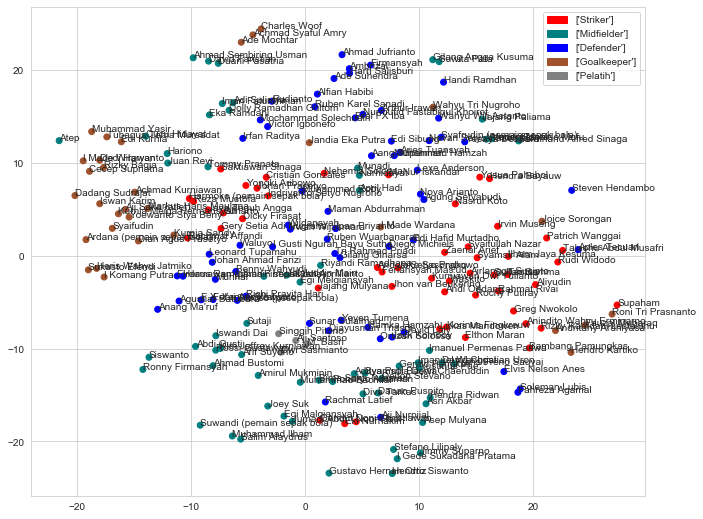

In [12]:
figure = plt.figure(figsize=(11, 9))
ax = figure.add_subplot(111)
ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors)

i=0
for pemain in nodepemain:
    ax.annotate(pemain, (embeddings_2d[i, 0], embeddings_2d[i, 1]))
    i=i+1
    
posisi_legend = [mpatches.Patch(color=color, label=df.Posisi.unique()) for df.Posisi, color in warna_posisi.items()]
ax.legend(handles=posisi_legend);

In [13]:
#Closeness Centrality Start
closeness_dict=nx.closeness_centrality(g)
nx.set_node_attributes(g, closeness_dict, "closeness")

In [15]:
import operator
urutan_closeness= sorted(closeness_dict.items(), key=operator.itemgetter(1), reverse=True)
print("Tiga Node berpengaruh Closeness centrality:")
for b in urutan_closeness[:3]:
    print(b)

Tiga Node berpengaruh Closeness centrality:
('Striker', 0.3712820512820513)
('Midfielder', 0.3667679837892604)
('Defender', 0.36163836163836166)


In [16]:
urutan_closeness= sorted(closeness_dict.items(), key=operator.itemgetter(1), reverse=False)
print("Tiga Node tidak berpengaruh Closeness centrality:")
for b in urutan_closeness[:3]:
    print(b)

Tiga Node tidak berpengaruh Closeness centrality:
('PS Bengkulu', 0.19770617149098854)
('Arema', 0.20533182076006806)
('PSP Padang', 0.20864553314121037)


(-0.9561195007580818,
 0.9952071039674768,
 -1.0997083634597578,
 1.1220828317457137)

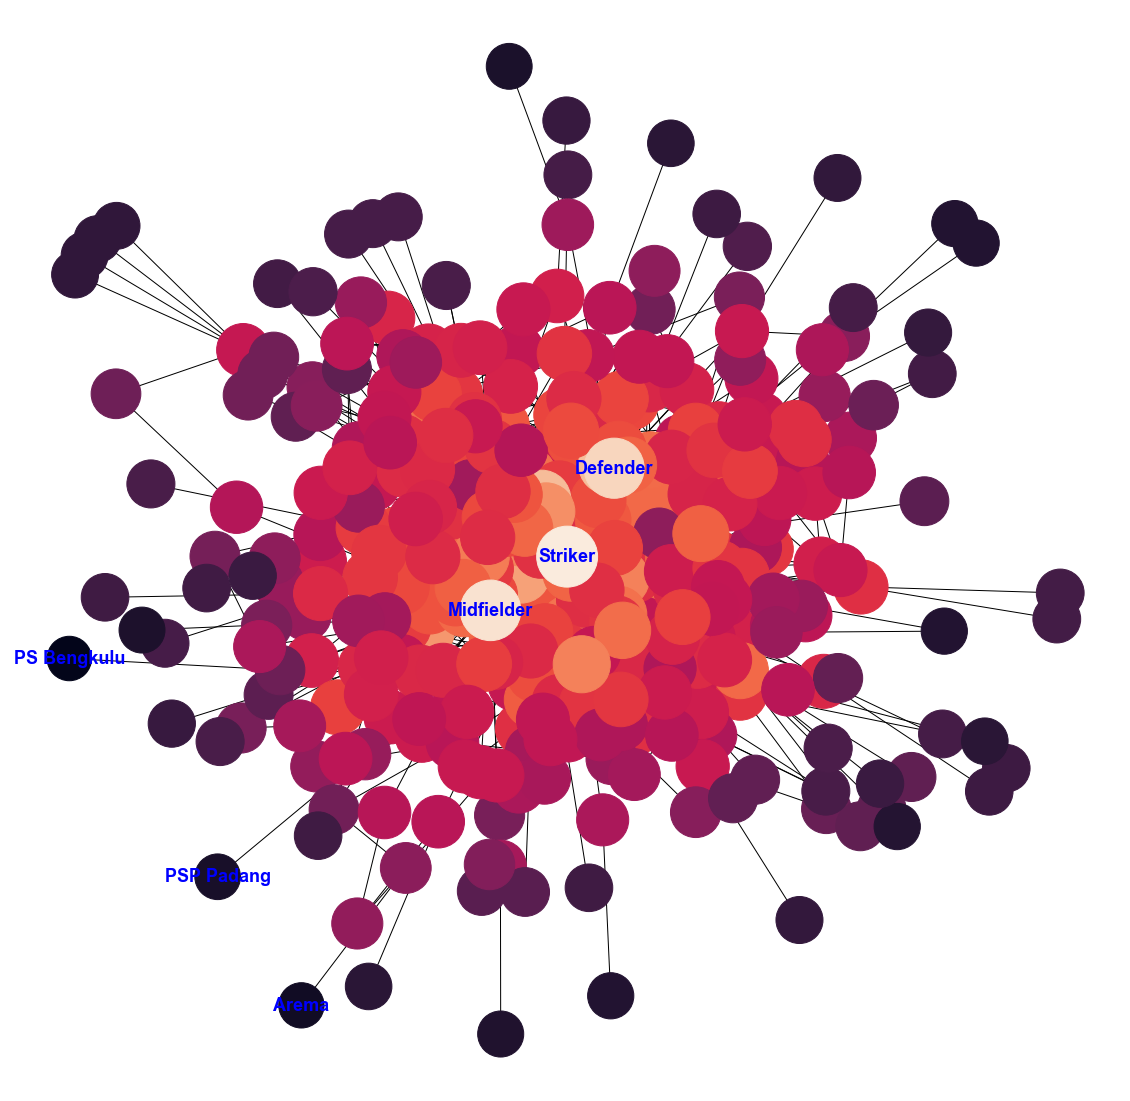

In [22]:
closeness_labels = { 'Striker' : 'Striker', 'Midfielder':'Midfielder' , 'Defender':'Defender', 
       
       'PS Bengkulu':'PS Bengkulu', 'Arema':'Arema', 'PSP Padang':'PSP Padang' 
}

pos = nx.spring_layout(g)
node_color = [20000.0 * closeness_dict[v] for v in g]
node_size = [v * 10000 for v in closeness_dict.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(g, pos=pos, labels=closeness_labels, node_color=node_color, node_size=node_size, font_weight='bold', 
                 font_color='blue', font_size='18')
plt.axis('off')